In [0]:
from sklearn import datasets
import keras
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# X -> features, y -> label 
X = pd.read_csv('/content/gdrive/My Drive/cloud_data/data/d6.csv')
y = pd.read_csv('/content/gdrive/My Drive/cloud_data/data/d3.csv')

In [0]:
cleanup_nums = {"Class_Name":{"'High'": 0, "'Low'": 3,"'Very Low'": 2,"'Medium'": 1}}
X.replace(cleanup_nums,inplace=True)
y.replace(cleanup_nums,inplace=True)
X.head()

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,7.000,7.455,7.727,12,128.72872,6,1,31.248,31.248,0
1,3.600,4.800,5.800,12,128.72872,6,1,31.248,31.248,0
2,3.455,4.909,5.818,12,128.72872,6,1,31.248,31.248,0
3,4.455,5.273,5.909,12,128.72872,6,1,31.248,31.248,0
4,3.500,5.100,5.900,12,128.72872,6,1,31.248,31.248,0


In [0]:
X_train=X.iloc[:,0:9].values
y_train=X.iloc[:,9].values
X_test=y.iloc[:,0:9].values
y_test=y.iloc[:,9].values
y_train[:5]

array([0, 0, 0, 0, 0])

In [0]:
X_train=normalize(X_train,axis=1)
X_test=normalize(X_test,axis=1)
print(X_train.shape)
print(X_test.shape)
#print("Examples of X_normalised\n",X_train[:10])
#print("Examples of X_normalised\n",X_train[:10])

(25697, 9)
(2450, 9)


In [0]:
y_train=np_utils.to_categorical(y_train,num_classes=4)
y_test=np_utils.to_categorical(y_test,num_classes=4)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (25697, 4)
Shape of y_test (2450, 4)


In [0]:
model=Sequential()
model.add(Dense(10,input_dim=9,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.add(Dropout(0.2))
model.add(Dense(4,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1,epochs=10,verbose=1)

Train on 25697 samples, validate on 2450 samples
Epoch 1/10
25697/25697 [==============================] - 33s 1ms/step - loss: 0.5790 - acc: 0.7784 - val_loss: 0.3732 - val_acc: 0.8714
Epoch 2/10
25697/25697 [==============================] - 32s 1ms/step - loss: 0.3559 - acc: 0.8708 - val_loss: 0.3005 - val_acc: 0.8735
Epoch 3/10
25697/25697 [==============================] - 32s 1ms/step - loss: 0.3099 - acc: 0.8759 - val_loss: 0.2876 - val_acc: 0.8739
Epoch 4/10
11141/25697 [============>.................] - ETA: 17s - loss: 0.2926 - acc: 0.8780

KeyboardInterrupt: ignored

In [0]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 96.36734693877551


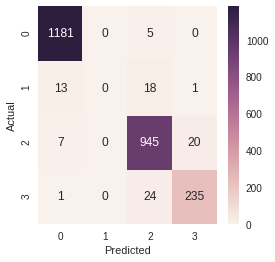

In [0]:
cm = confusion_matrix(y["Class_Name"], predict_label)
cm

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()